# Chapter 12: How Classifiers Work (2 of 2)

Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

The source code for this chapter is split over two notebooks. This is the second one, about the decision boundary and the model of neural network.

## Load Data

Execute one of the next three cells, to load one of the three datasets.

In [26]:
import numpy as np
# x1, x2, y = np.loadtxt('linearly_separable.txt', skiprows=1, unpack=True)
x1, x2, y = np.loadtxt('non_linearly_separable.txt', skiprows=1, unpack=True)
#x1, x2, y = np.loadtxt('circles.txt', skiprows=1, unpack=True)

## Neural Network

In [27]:
# A neural network implementation.

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
"""
The first line in softmax() calculates the exponentials of the logits. 
The second line divides each exponential by the sum of all the exponentials on the same row. 
The parameter axis=1 means: “calculate the sum by row, not over the entire matrix.” 
Before doing the division, we must reshape the sums into a one-column matrix, Otherwise, 
NumPy complains that it cannot divide a matrix by a one-dimensional array.
""" 
def softmax(logits):
    exponentials = np.exp(logits)
    return exponentials / np.sum(exponentials, axis=1).reshape(-1, 1)

def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

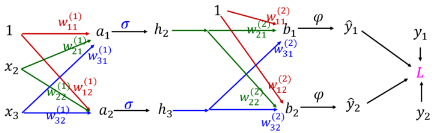

In [29]:
def forward(X, w1, w2):
    h = sigmoid(np.matmul(prepend_bias(X), w1))
    y_hat = softmax(np.matmul(prepend_bias(h), w2))
    return (y_hat, h)

def loss(Y, y_hat):
    return -np.sum(Y * np.log(y_hat)+(1-Y)* np.log(1-y_hat))/ Y.shape[0]

In [30]:
def sigmoid_gradient(sigmoid):
    return np.multiply(sigmoid, (1 - sigmoid))

"""
X.shape[0] is the number of rows in X, that is, the number of examples in the training set. 
This division is there because the matrix multiplication gives us the accumulated
gradient over all the examples. Because we want the average gradient, we have
to divide the result of the multiplication by the size of the training set.
"""

def back(X, Y, y_hat, w2, h):
    dw2 = np.matmul(prepend_bias(h).T, (y_hat - Y)) / X.shape[0]
    dh  = np.matmul(y_hat - Y, w2[1:].T)
    da  = dh * sigmoid_gradient(h)
    dw1 = np.matmul(prepend_bias(X).T, da)/X.shape[0]
    
#    dW1 = np.matmul(prepend_bias(X).T, np.matmul(y_hat-Y, w2[1:].T)* sigmoid_gradient(h))/X.shape[0]
    return (dw1, dw2)


def classify(X, w1, w2):
    y_hat, _ = forward(X, w1, w2)
    labels = np.argmax(y_hat, axis=1)
    return labels.reshape(-1, 1)

"""
We should initialize weights with values that are:
• Random (to break symmetry)
• Small (to speed up training and avoid dead neurons)
The absolute value of each weight shouldn’t be much bigger than the square root of the inverse of rows. 
As the weight matrix gets bigger, individual weights should become smaller.

"""

def initialize_weights(n_input_variables, n_hidden_nodes, n_classes):
    w1_rows = n_input_variables + 1
    w1 = np.random.randn(w1_rows, n_hidden_nodes) * np.sqrt(1 / w1_rows)

    w2_rows = n_hidden_nodes + 1
    w2 = np.random.randn(w2_rows, n_classes) * np.sqrt(1 / w2_rows)

    return (w1, w2)


def report(iteration, X_train, Y_train, X_test, Y_test, w1, w2):
    y_hat, _ = forward(X_train, w1, w2)
    training_loss = loss(Y_train, y_hat)
    classifications = classify(X_test, w1, w2)
    accuracy = np.average(classifications == Y_test) * 100.0
    if iteration % 5000 == 0:
        print("Iteration: %5d, Loss: %.8f, Accuracy: %.2f%%" %
              (iteration, training_loss, accuracy))


def train(X_train, Y_train, X_test, Y_test, n_hidden_nodes, iterations, lr):
    n_input_variables = X_train.shape[1]
    n_classes = Y_train.shape[1]
    w1, w2 = initialize_weights(n_input_variables, n_hidden_nodes, n_classes)
    for iteration in range(iterations):
        y_hat, h = forward(X_train, w1, w2)
        w1_gradient, w2_gradient = back(X_train, Y_train, y_hat, w2, h)
        w1 = w1 - (w1_gradient * lr)
        w2 = w2 - (w2_gradient * lr)
        report(iteration, X_train, Y_train, X_test, Y_test, w1, w2)
    return (w1, w2)


## Train Neural Network

In [31]:
def one_hot_encode(Y):
    n_labels = Y.shape[0]
    result = np.zeros((n_labels, 2))
    for i in range(n_labels):
        result[i][Y[i]] = 1
    return result

In [32]:
print(type(y))

<class 'numpy.ndarray'>


In [33]:
X_train = X_test = np.column_stack((x1, x2))
Y_train_unencoded = Y_test = y.astype(int).reshape(-1, 1)
Y_train = one_hot_encode(Y_train_unencoded)

In [34]:
X_train.shape

(300, 2)

In [35]:
Y_train.shape

(300, 2)

In [36]:

w1, w2 = train(X_train, Y_train,
                  X_test, Y_test,
                  n_hidden_nodes=10, iterations=100000, lr=0.3)


Iteration:     0, Loss: 1.65091425, Accuracy: 36.00%
Iteration:  5000, Loss: 0.61487455, Accuracy: 90.00%
Iteration: 10000, Loss: 0.43991862, Accuracy: 94.00%
Iteration: 15000, Loss: 0.42868441, Accuracy: 94.67%
Iteration: 20000, Loss: 0.41821908, Accuracy: 94.00%
Iteration: 25000, Loss: 0.40324282, Accuracy: 93.33%
Iteration: 30000, Loss: 0.38461620, Accuracy: 93.00%
Iteration: 35000, Loss: 0.36943227, Accuracy: 93.00%
Iteration: 40000, Loss: 0.34891431, Accuracy: 93.67%
Iteration: 45000, Loss: 0.32316729, Accuracy: 94.33%
Iteration: 50000, Loss: 0.30068053, Accuracy: 95.00%
Iteration: 55000, Loss: 0.28441632, Accuracy: 95.67%
Iteration: 60000, Loss: 0.27143789, Accuracy: 95.67%
Iteration: 65000, Loss: 0.25929083, Accuracy: 95.67%


C:\Users\BioXGEM\AppData\Local\Temp\ipykernel_18472\3868217288.py:7: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y * np.log(y_hat)+(1-Y)* np.log(1-y_hat))/ Y.shape[0]
C:\Users\BioXGEM\AppData\Local\Temp\ipykernel_18472\3868217288.py:7: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y * np.log(y_hat)+(1-Y)* np.log(1-y_hat))/ Y.shape[0]


Iteration: 70000, Loss: nan, Accuracy: 96.33%
Iteration: 75000, Loss: nan, Accuracy: 96.33%
Iteration: 80000, Loss: nan, Accuracy: 96.67%
Iteration: 85000, Loss: nan, Accuracy: 97.00%
Iteration: 90000, Loss: nan, Accuracy: 97.00%
Iteration: 95000, Loss: nan, Accuracy: 97.00%


# Plot Decision Boundary

Calculating boundary...


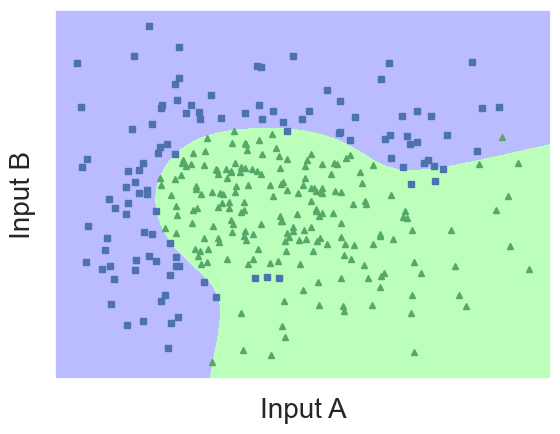

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate a mesh over one-dimensional data
# (The mesh() and plot_boundary() functionality were inspired by the
# documentation of the BSD-licensed scikit-learn library.)
def mesh(values):
    range = values.max() - values.min()
    padding_percent = 5
    padding = range * padding_percent * 0.01
    resolution = 1000
    interval = (range + 2 * range * padding) / resolution
    return np.arange(values.min() - padding, values.max() + padding, interval)


def plot_boundary(points, w1, w2):
    print("Calculating boundary...")
    # Generate a grid of points over the data
    x_mesh = mesh(points[:, 0])
    y_mesh = mesh(points[:, 1])
    grid_x, grid_y = np.meshgrid(x_mesh, y_mesh)
    grid = np.c_[grid_x.ravel(), grid_y.ravel()]
    # Classify points in the grid
    classifications = classify(grid, w1, w2).reshape(grid_x.shape)
    # Trace the decision boundary
    BLUE_AND_GREEN = ListedColormap(['#BBBBFF', '#BBFFBB'])
    plt.contourf(grid_x, grid_y, classifications, cmap=BLUE_AND_GREEN)


def plot_data_by_label(input_variables, labels, label_selector, symbol):
    points = input_variables[(labels == label_selector).flatten()]
    plt.plot(points[:, 0], points[:, 1], symbol, markersize=4)


plot_boundary(X_train, w1, w2)
plot_data_by_label(X_train, Y_train_unencoded, 0, 'bs')
plot_data_by_label(X_train, Y_train_unencoded, 1, 'g^')
plt.gca().axes.set_xlabel("Input A", fontsize=20)
plt.gca().axes.set_ylabel("Input B", fontsize=20)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# Plot Model

In [38]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_zticks([0, 0.5, 1])
ax.set_xlabel("Input A", labelpad=15, fontsize=30)
ax.set_ylabel("Input B", labelpad=15, fontsize=30)
ax.set_zlabel("ŷ", labelpad=5, fontsize=30)

# Plot the data points
blue_squares = X_train[(Y_train_unencoded == 0).flatten()]
ax.scatter(blue_squares[:, 0], blue_squares[:, 1], 0, c='b', marker='s')
green_triangles = X_train[(Y_train_unencoded == 1).flatten()]
ax.scatter(green_triangles[:, 0], green_triangles[:, 1], 1, c='g', marker='^')

# Plot the model
MARGIN = 0.5
MESH_SIZE = 1000  # This model has a lot of detail, so we need a hi-res mesh
x, y = np.meshgrid(np.linspace(x1.min() - MARGIN, x1.max() + MARGIN, MESH_SIZE),
                   np.linspace(x2.min() - MARGIN, x2.max() + MARGIN, MESH_SIZE))
grid = zip(np.ravel(x), np.ravel(y))
# Calculate all the outputs of forward(), in the format (y_hat, h):
forwards = [forward(np.column_stack(([i], [j])), w1, w2) for i, j in grid]
# For each (y_hat, y), keep only the second column of y_hat:
z = np.array([y_hat for y_hat, h in forwards])[:, 0, 1]
z = z.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(x, y, z, alpha=0.75, cmap=cm.winter,
                linewidth=0, antialiased=True)
plt.show()


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [ ]:
c=np.array([1, 2])
print('c=',c)
d=np.array([[1,2], [3,4], [5,6]])
print('d=',d)
print('d*c=',d*c)

c= [1 2]
d= [[1 2]
 [3 4]
 [5 6]]
d*c= [[ 1  4]
 [ 3  8]
 [ 5 12]]
